## Observations and Insights 

In [1]:
# Dependencies and Setup
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
from scipy.stats import sem
import os
import statistics 




# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mice_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')


# Display the data table for preview
combined_mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
combined_mice_df.dtypes
unique_mice = combined_mice_df["Mouse ID"].count()
unique_mice

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dups = [combined_mice_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
print (dups)



[0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool]


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_mice_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].count()

1883

## Summary Statistics

['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']


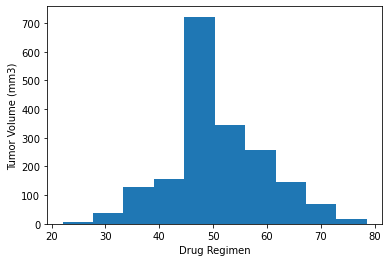

50.44930961960702
48.95136773
0    45.0
dtype: float64
NormaltestResult(statistic=3.5915542899157287, pvalue=0.16599839738857916)
The standard deviation of mice tuors is: 8.91
The SEM value for the sample mice data is 0.20543691976738135


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# # Filter the DataFrame down only to those columns needed
tumor_regimen = clean_df[['Drug Regimen','Tumor Volume (mm3)']]

# find unique regimens
unique = tumor_regimen["Drug Regimen"].unique()
print(unique)


# # # # Set the index to be "Drug Regimen"
tumor_regimen2 = tumor_regimen.set_index(["Drug Regimen","Tumor Volume (mm3)"])
tumor_regimen2.mean(axis = 1, level = 0)


# # iterate through tumor volumes of regimens

# #Print summary stats and histogram
plt.hist(tumor_regimen['Tumor Volume (mm3)'])
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()
print(tumor_regimen['Tumor Volume (mm3)'].mean())
print(tumor_regimen['Tumor Volume (mm3)'].median())
print(tumor_regimen['Tumor Volume (mm3)'].mode())
print(sts.normaltest(tumor_regimen['Tumor Volume (mm3)'].sample(200)))
print(f"The standard deviation of mice tuors is: {round(tumor_regimen['Tumor Volume (mm3)'].std(),2)}")

# # sample_tumor_regimen = tumor_regimen.sample(30)
print(f"The SEM value for the sample mice data is {sem(tumor_regimen['Tumor Volume (mm3)'])}")

# # This method is the most straighforward, creating multiple series and putting them all together at the end.
mean_tumor = (tumor_regimen['Tumor Volume (mm3)'].mean())
mean_tumor
median_tumor = (tumor_regimen['Tumor Volume (mm3)'].median())
mode_tumor = (tumor_regimen['Tumor Volume (mm3)'].mode())
std_tumor = (tumor_regimen['Tumor Volume (mm3)'].std(),2)
var_tumor = statistics.variance((tumor_regimen['Tumor Volume (mm3)']))

# # # Build summary table


In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
table_data = pd.DataFrame(tumor_regimen.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].describe())
table_data
# This method produces everything in a single groupby function
regimen_group = clean_df.groupby("Drug Regimen")
mice_avg = regimen_group['Tumor Volume (mm3)'].mean()
mice_avg

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.458254
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

## Bar and Pie Charts

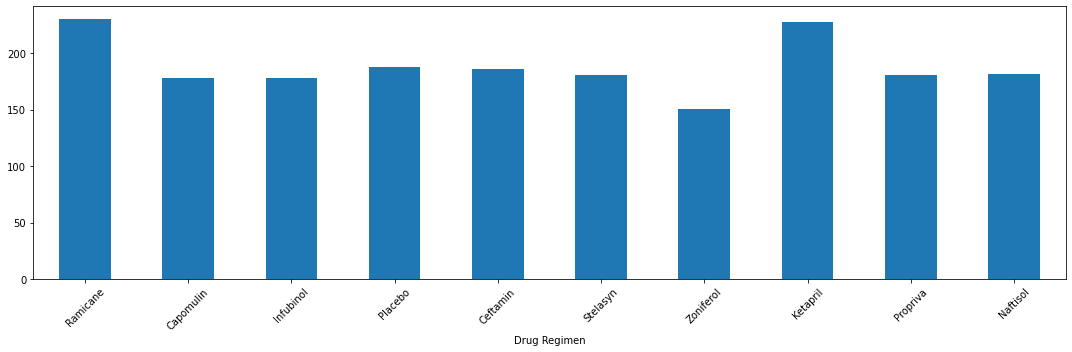

In [56]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

mice_count = regimen_group['Tumor Volume (mm3)'].count()
mice_count

pandas_plot = mice_count.plot(kind='bar', figsize = (15,5))

# ## create the x-axis tick markers
pandas_plot.set_xticklabels(unique, rotation = 45)


plt.tight_layout()

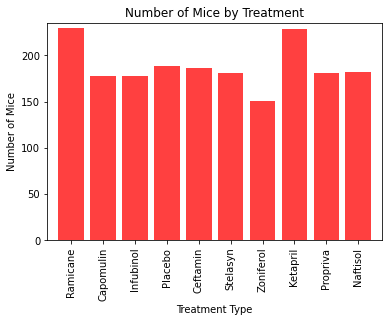

<Figure size 432x288 with 0 Axes>

In [57]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mice_count = regimen_group['Tumor Volume (mm3)'].count()
mice_count

# ## create the x-axis tick markers
x_axis = np.arange(0, len(unique))

# # ## Add titles and axis labels
plt.title("Number of Mice by Treatment")
plt.xlabel("Treatment Type")
plt.ylabel("Number of Mice")

# # ## Define the limits of the x and y axis using the data 
plt.xlim(-0.75, len(unique)-.25)
plt.ylim(0, max(mice_count) + 5)

# # ## Plot the data and add the styling
plt.bar(x_axis, (mice_count), facecolor="red", alpha=0.75, align="center")
plt.xticks(x_axis,(unique), rotation=90)
plt.show()
plt.tight_layout()


Sex
Female    925
Male      958
Name: Sex, dtype: int64


ValueError: pie requires either y column or 'subplots=True'

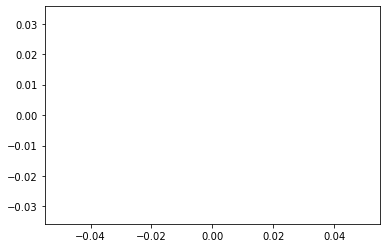

In [82]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_df.groupby("Sex")
gender_count =gender['Sex'].count()
print(gender_count)

# # ## create the x-axis tick markers
plt.axis('equal')
explode = (0)
colors = ['#191970','#001CF0']
gender_plot = gender.plot(kind='pie')
plt.legend(labels=gender_count,loc="best")
plt.tight_layout()

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
